##########################################################
#### File: RattanavilayThip_4_2 Exercise_Sentiment_Analysis<br>
#### Name: Thip Rattanavilay<br>
#### Date: 04/8/2021<br>
#### Course: DSC 550 - 4.2 Exercise: Sentiment Analysis<br>
##########################################################

### In this exercise, you will do a sentiment analysis of text comments.

1. Load the data file DailyComments.csv from the Week 4 Data Files into a data frame.
2. Identify a scheme to categorize each comment as positive or negative. You can devise your own scheme or find a commonly used scheme to perform this sentiment analysis. However you decide to do this, make sure to explain the scheme you decide to use.
3. Implement your sentiment analysis with code and display the results. Note: DailyComments.csv is a purposely small file, so you will be able to clearly see why the results are what they are.
4. For up to 5% extra credit, find another set of comments, e.g., some tweets, and perform the same sentiment analysis

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

## 1. Load the data file DailyComments.csv from the Week 4 Data Files into a data frame.

In [2]:
# 1. Load the data file DailyComments.csv from the Week 4 Data Files into a data frame.
df = pd.read_csv("DailyComments.csv")
df

,Day of Week,comments
0,Monday,"Hello, how are you?"
1,Tuesday,Today is a good day!
2,Wednesday,It's my birthday so it's a really special day!
3,Thursday,Today is neither a good day or a bad day!
4,Friday,I'm having a bad day.
5,Saturday,There' s nothing special happening today.
6,Sunday,Today is a SUPER good day!


In [3]:
# Cleaning Process
# A. Convert all text to lowercase letters.
df['comments_cleaned'] = df['comments'].str.lower()
df

,Day of Week,comments,comments_cleaned
0,Monday,"Hello, how are you?","hello, how are you?"
1,Tuesday,Today is a good day!,today is a good day!
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day or a bad day!
4,Friday,I'm having a bad day.,i'm having a bad day.
5,Saturday,There' s nothing special happening today.,there' s nothing special happening today.
6,Sunday,Today is a SUPER good day!,today is a super good day!


In [4]:
# B. Remove all punctuation from the text.

import string
# strip off punctuation characters as shown below
# '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
df['comments_cleaned'] = df['comments_cleaned'].str.translate(str.maketrans('','',string.punctuation))
df

,Day of Week,comments,comments_cleaned
0,Monday,"Hello, how are you?",hello how are you
1,Tuesday,Today is a good day!,today is a good day
2,Wednesday,It's my birthday so it's a really special day!,its my birthday so its a really special day
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day or a bad day
4,Friday,I'm having a bad day.,im having a bad day
5,Saturday,There' s nothing special happening today.,there s nothing special happening today
6,Sunday,Today is a SUPER good day!,today is a super good day


In [5]:
# C. Remove stop words.

#nltk.download('stopwards')
# installed through command line
# Self Notes: python -m nltk.downloader stopwords

stop_words=stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
# This splits, removes any stopwords and then joins back the txt

df['comments_cleaned'] = df['comments_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df

,Day of Week,comments,comments_cleaned
0,Monday,"Hello, how are you?",hello
1,Tuesday,Today is a good day!,today good day
2,Wednesday,It's my birthday so it's a really special day!,birthday really special day
3,Thursday,Today is neither a good day or a bad day!,today neither good day bad day
4,Friday,I'm having a bad day.,im bad day
5,Saturday,There' s nothing special happening today.,nothing special happening today
6,Sunday,Today is a SUPER good day!,today super good day


In [6]:
# D. Apply NLTK’s PorterStemmer.

porter = PorterStemmer()
df['comments_cleaned'] = df['comments_cleaned'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))
df

,Day of Week,comments,comments_cleaned
0,Monday,"Hello, how are you?",hello
1,Tuesday,Today is a good day!,today good day
2,Wednesday,It's my birthday so it's a really special day!,birthday realli special day
3,Thursday,Today is neither a good day or a bad day!,today neither good day bad day
4,Friday,I'm having a bad day.,im bad day
5,Saturday,There' s nothing special happening today.,noth special happen today
6,Sunday,Today is a SUPER good day!,today super good day


In [7]:
# Save a copy of this in csv as backup for future steps with TR initial (TR = Thip Rattanavilay)
df.to_csv("DailyComments_cleaned_TR.csv")

## 2. Identify a scheme to categorize each comment as positive or negative. You can devise your own scheme or find a commonly used scheme to perform this sentiment analysis. However you decide to do this, make sure to explain the scheme you decide to use.

In [8]:
# As a first step, creating bag of words from the cleaned_comments
from sklearn.feature_extraction.text import CountVectorizer

# Create the bag of words feature matrix
count = CountVectorizer()

#bag_of_words

bag_of_words = count.fit_transform(np.array(df['comments_cleaned']))
arr = bag_of_words.toarray()
df_bow = pd.DataFrame(bag_of_words.toarray(), columns= count.get_feature_names())
df_bow

,bad,birthday,day,good,happen,hello,im,neither,noth,realli,special,super,today
0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,1
2,0,1,1,0,0,0,0,0,0,1,1,0,0
3,1,0,2,1,0,0,0,1,0,0,0,0,1
4,1,0,1,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,1,0,1,0,1
6,0,0,1,1,0,0,0,0,0,0,0,1,1


In [9]:
# Defining positive and negative words for our analysis
df_new = pd.DataFrame({'text' : df['comments_cleaned']})

# Based on the above bag of words would use the following words as positive or negative
# Each positive word adds up a point, while negative reduces the points
# Self Notes: We may set different weightage to each of this words based on what degree they represent.
# eg. good - 1, best - 2
# Additionally if the words are used with a negative word there might be a chance that the meaning becomes reverse
# Eg. I had Super Bad Day, though Super may be is a +2 points, however if used with Bad may become - 2. 
# This is just food for thought for future, however we should use standardized methods(already available libraries)
df_new['positive1'] = df_new.text.str.count('good')
#df_new['positive2']= df_new.text.str.count('special')
df_new['positive2']= df_new.text.str.count('birthday')
#df_new['positive4']= df_new.text.str.count('super')
df_new['negative1'] = df_new.text.str.count('bad')
#df_new['negative2'] = df_new.text.str.count('nothing')
df_new['TotScore'] = df_new.positive1 + df_new.positive2 - df_new.negative1
df_new

,text,positive1,positive2,negative1,TotScore
0,hello,0,0,0,0
1,today good day,1,0,0,1
2,birthday realli special day,0,1,0,1
3,today neither good day bad day,1,0,1,0
4,im bad day,0,0,1,-1
5,noth special happen today,0,0,0,0
6,today super good day,1,0,0,1


## 3. Implement your sentiment analysis with code and display the results. 
### Note: DailyComments.csv is a purposely small file, so you will be able to clearly see why the results are what they are.

In [10]:
# TotScore and main df to see the results
df['Score'] = df_new['TotScore']
df

,Day of Week,comments,comments_cleaned,Score
0,Monday,"Hello, how are you?",hello,0
1,Tuesday,Today is a good day!,today good day,1
2,Wednesday,It's my birthday so it's a really special day!,birthday realli special day,1
3,Thursday,Today is neither a good day or a bad day!,today neither good day bad day,0
4,Friday,I'm having a bad day.,im bad day,-1
5,Saturday,There' s nothing special happening today.,noth special happen today,0
6,Sunday,Today is a SUPER good day!,today super good day,1


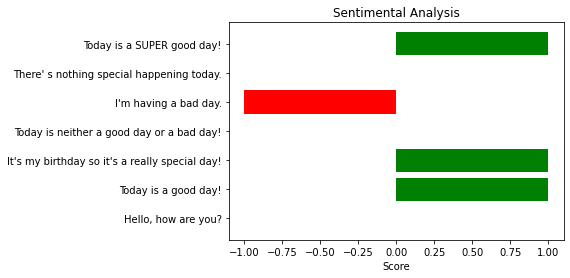

In [11]:
# Displaying the same as bar chart for understanding

def colorizer(arr):
    if arr > 0.0:
        return "green"
    elif 0.0 > arr:
        return "red"
    else:
        return "blue"

plt.figure()
plt.barh(df['comments'], df['Score'], color = df['Score'].apply(colorizer))
plt.title("Sentimental Analysis")
plt.xlabel("Score")
plt.show()

In [12]:
# Trying out some standard libraries
# install TextBlob
# Using core Text Blob
# You can find it on Github: https://github.com/nltk/nltk_data/tree/gh-pages/packages


from textblob import TextBlob
def textBlobSentiment(data):
    return TextBlob(data).sentiment.polarity

df["TextBlobScore"] = df['comments_cleaned'].apply(textBlobSentiment).round(2)

df

,Day of Week,comments,comments_cleaned,Score,TextBlobScore
0,Monday,"Hello, how are you?",hello,0,0.00
1,Tuesday,Today is a good day!,today good day,1,0.70
2,Wednesday,It's my birthday so it's a really special day!,birthday realli special day,1,0.36
3,Thursday,Today is neither a good day or a bad day!,today neither good day bad day,0,0.00
4,Friday,I'm having a bad day.,im bad day,-1,-0.70
5,Saturday,There' s nothing special happening today.,noth special happen today,0,0.36
6,Sunday,Today is a SUPER good day!,today super good day,1,0.52


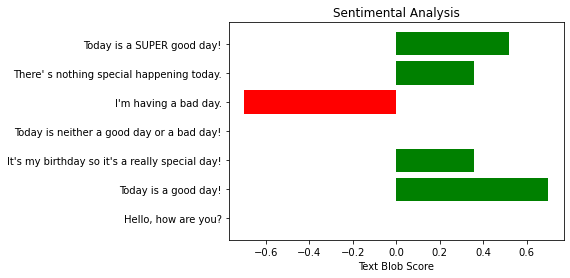

In [13]:
# TextBlob Score
plt.figure()
plt.barh(df['comments'], df['TextBlobScore'], color = df['TextBlobScore'].apply(colorizer))
plt.title("Sentimental Analysis")
plt.xlabel("Text Blob Score")
plt.show()

In [14]:
# Downloading package movie_reviews

import nltk
# nltk.download('movie_reviews')

In [15]:
# Trying NaiveBayesAnalyzer from TextBlob

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
# nltk.download('movie_reviews')

def NaiveBayesAnalyzerSentiment(data):
    resultNB = TextBlob(data, analyzer=NaiveBayesAnalyzer()).sentiment
    return (resultNB.p_pos - resultNB.p_neg)


df["NaiveBayesScore"] = df['comments_cleaned'].apply(NaiveBayesAnalyzerSentiment).round(2)
df


,Day of Week,comments,comments_cleaned,Score,TextBlobScore,NaiveBayesScore
0,Monday,"Hello, how are you?",hello,0,0.00,-0.22
1,Tuesday,Today is a good day!,today good day,1,0.70,0.45
2,Wednesday,It's my birthday so it's a really special day!,birthday realli special day,1,0.36,0.06
3,Thursday,Today is neither a good day or a bad day!,today neither good day bad day,0,0.00,-0.12
4,Friday,I'm having a bad day.,im bad day,-1,-0.70,-0.23
5,Saturday,There' s nothing special happening today.,noth special happen today,0,0.36,0.35
6,Sunday,Today is a SUPER good day!,today super good day,1,0.52,0.25


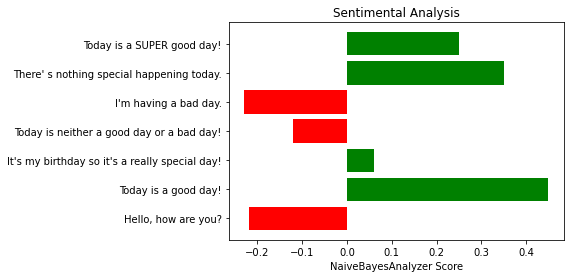

In [16]:
# NaiveBayesAnalyzer Score
plt.figure()
plt.barh(df['comments'], df['NaiveBayesScore'], color = df['NaiveBayesScore'].apply(colorizer))
plt.title("Sentimental Analysis")
plt.xlabel("NaiveBayesAnalyzer Score")
plt.show()

# 4. For up to 5% extra credit, find another set of comments, e.g., some tweets, and perform the same sentiment analysis.

In [18]:
import nltk

# downloaded twitter samples
# nltk.download('twitter_samples')
# nltk.download('punkt')

from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')


In [19]:
# Converting to dfs
df_negative = pd.DataFrame(negative_tweets)
df_positive = pd.DataFrame(positive_tweets)
df_twitter_samples = pd.DataFrame(text)

df_negative.columns = ['negative_tweets']
df_positive.columns = ['positive_tweets']
df_twitter_samples.columns = ['tweets']

In [20]:
df_positive

,positive_tweets
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,@Lamb2ja Hey James! How odd :/ Please call our...
2,@DespiteOfficial we had a listen last night :)...
3,@97sides CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...
...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D..."
4996,@RachelLiskeard Thanks for the shout-out :) It...
4997,@side556 Hey! :) Long time no talk...
4998,@staybubbly69 as Matt would say. WELCOME TO AD...


In [21]:
df_negative

,negative_tweets
0,hopeless for tmr :(
1,Everything in the kids section of IKEA is so c...
2,@Hegelbon That heart sliding into the waste ba...
3,"“@ketchBurning: I hate Japanese call him ""bani..."
4,"Dang starting next week I have ""work"" :("
...,...
4995,I wanna change my avi but uSanele :(
4996,MY PUPPY BROKE HER FOOT :(
4997,where's all the jaebum baby pictures :((
4998,But but Mr Ahmad Maslan cooks too :( https://t...


In [22]:
df_twitter_samples

,tweets
0,RT @KirkKus: Indirect cost of the UK being in ...
1,VIDEO: Sturgeon on post-election deals http://...
2,RT @LabourEoin: The economy was growing 3 time...
3,RT @GregLauder: the UKIP east lothian candidat...
4,RT @thesundaypeople: UKIP's housing spokesman ...
...,...
19995,RT @UKLabour: .@Ed_Miliband: we're not going t...
19996,RT @DisabledScot: @blairmcdougall @ScotlandTon...
19997,RT @Staircase2: @VividRicky exactly but that a...
19998,Actually agreed with %95 of what farage was sa...


In [23]:
# Will clean the df_twitter_samples
# A. Convert all text to lowercase letters.

df_twitter_samples['cleaned'] = df_twitter_samples['tweets'].str.lower()
df_twitter_samples

# B. Remove all punctuation from the text.
import string
# strip off punctuation characters as shown below
# '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
df_twitter_samples['cleaned'] = df_twitter_samples['cleaned'].str.translate(str.maketrans('','',string.punctuation))

# C. Remove stop words.

#nltk.download('stopwards')
# installed through command line
# Self Notes: python -m nltk.downloader stopwords

stop_words=stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
# This splits, removes any stopwords and then joins back the txt

df_twitter_samples['cleaned'] = df_twitter_samples['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df
# D. Apply NLTK’s PorterStemmer.
porter = PorterStemmer()
df_twitter_samples['cleaned'] = df_twitter_samples['cleaned'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

# E. Save a copy of this in csv as backup for future steps
df_twitter_samples.to_csv("Tweets_cleaned_TR.csv")
df_twitter_samples

,tweets,cleaned
0,RT @KirkKus: Indirect cost of the UK being in ...,rt kirkku indirect cost uk eu estim cost brita...
1,VIDEO: Sturgeon on post-election deals http://...,video sturgeon postelect deal httptcobtjwrpbmoy
2,RT @LabourEoin: The economy was growing 3 time...,rt laboureoin economi grow 3 time faster day d...
3,RT @GregLauder: the UKIP east lothian candidat...,rt greglaud ukip east lothian candid look 16 s...
4,RT @thesundaypeople: UKIP's housing spokesman ...,rt thesundaypeopl ukip hous spokesman rake £80...
...,...,...
19995,RT @UKLabour: .@Ed_Miliband: we're not going t...,rt uklabour edmiliband go deal snp coalit snp ...
19996,RT @DisabledScot: @blairmcdougall @ScotlandTon...,rt disabledscot blairmcdougal scotlandtonight ...
19997,RT @Staircase2: @VividRicky exactly but that a...,rt staircase2 vividricki exactli alleg commut ...
19998,Actually agreed with %95 of what farage was sa...,actual agre 95 farag sayin rhenvoteukip


In [24]:
# Text Blob Score 
# reducing sample size as NaiveBayes Classifier gets stuck when processing through huge data
df_twitter_reduced = df_twitter_samples.sample(frac = 0.01)
df_twitter_reduced["TextBlobScore"] = df_twitter_reduced['cleaned'].apply(textBlobSentiment).round(2)

In [25]:
# NaiveBayesAnalyzer Sentiment score
df_twitter_reduced["NaiveBayesScore"] = df_twitter_reduced['cleaned'].apply(NaiveBayesAnalyzerSentiment).round(2)

In [26]:
df_twitter_reduced

,tweets,cleaned,TextBlobScore,NaiveBayesScore
18279,RT @CraigMcWilliam: @kdugdalemsp @Ed_Miliband ...,rt craigmcwilliam kdugdalemsp edmiliband ed mi...,0.00,0.12
3492,RT @Tommy_Colc: Financial Times come out in su...,rt tommycolc financi time come support tori cl...,0.00,0.87
1380,@ScotlandTonight @bbcqt kind of ruins Jim Murp...,scotlandtonight bbcqt kind ruin jim murphi man...,0.60,0.47
7842,RT @aliboomaye: The hype and demonisation of t...,rt aliboomay hype demonis snp broken expertli ...,-0.40,0.14
6590,RT @MrHarryCole: So Ed Miliband gets out from ...,rt mrharrycol ed miliband get behind lectern trip,-0.40,0.07
...,...,...,...,...
1639,"@JonathanCohn a minority gov't is possible, th...",jonathancohn minor govt possibl though less st...,-0.11,0.74
5052,#UKIP are great at disseminating mythinformati...,ukip great dissemin mythinform favorit tactic ...,0.37,0.10
1880,RT @AndrewzCooper: Feels increasingly likely t...,rt andrewzcoop feel increasingli like cameron ...,-0.07,0.70
7924,Ed rules out SNP deal… even if it costs him No...,ed rule snp deal… even cost no10 labour leader...,0.00,-0.01
